## Author : Sapna Singh

## The Sparks foundation intern  for role of Data Science and Business Analysis 

## Task 4 :Exploratory Data Analysis - Terrorism  
### Level - Intermediate

### Aim :To Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ to find out the hot zone of terrorism

### Importing libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")


### Loading dataset 

In [2]:
## Loading our data set in notebook
data =pd.read_csv(r"globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

In [3]:
data.head() # first five rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape # 1,81,691 rows and 135 columns count

(181691, 135)

We can see that there are lot of columns , let's take required columns only 

### Keeping necessary columns from the dataset and storing in new dataframe

In [5]:
## Dlelecting columns required for analysis 
datareq = data[["iyear","imonth","iday","extended","country_txt","region_txt","city","location","provstate","suicide","success","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt",'nkill','nwound']]

In [6]:
## creating a new column  casualities 
datareq['casualties'] = datareq['nkill'] + datareq['nwound'] # 

In [7]:
datareq.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,location,provstate,suicide,success,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,casualties
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,NaN,0,1,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,NaN,Federal,0,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,NaN,Tarlac,0,1,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,NaN,Attica,0,1,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,NaN,Fukouka,0,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [8]:
# checking how much perecentage of missing rows each column has 
missing_values= pd.DataFrame(datareq.isnull().sum()/datareq.shape[0] , columns=["missing_rows"])
missing_values.round(2)

,missing_rows
iyear,0.00
imonth,0.00
iday,0.00
extended,0.00
country_txt,0.00
region_txt,0.00
city,0.00
location,0.69
provstate,0.00
suicide,0.00


Motive has lot of missng rows i.e 72.17%  and location has 62% of missing rowa whereas all other columns have less than 10 % of missing rows 

In [9]:
## datatypes  of columns in datasset
datareq.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   extended         181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181257 non-null  object 
 7   location         55495 non-null   object 
 8   provstate        181270 non-null  object 
 9   suicide          181691 non-null  int64  
 10  success          181691 non-null  int64  
 11  attacktype1_txt  181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  gname            181691 non-null  object 
 14  motive           50561 non-null   object 
 15  weaptype1_txt    181691 non-null  object 
 16  nkill            171378 non-null  floa

In [10]:
## dropping columns with large no of missing rows 
datareq.drop("motive",axis=1,inplace=True)
datareq.drop("location",axis=1,inplace=True)

In [11]:
datareq.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,provstate,suicide,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound,casualties
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,0,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,Federal,0,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,Tarlac,0,1,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,Attica,0,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,0,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,NaN


In [12]:
## dropping null values from dataset
datareq.dropna(inplace=True) 

In [13]:
## checking again if all null values have been removed 
datareq.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country_txt        0
region_txt         0
city               0
provstate          0
suicide            0
success            0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
nkill              0
nwound             0
casualties         0
dtype: int64

No missing values in our dataset

In [14]:
## checking for duplicate rows 
datareq.duplicated().sum()

12270

In [15]:
#Dropping the duplicate record
datareq = datareq.drop_duplicates()
datareq.shape

(151724, 17)

## Step 3 :Univariate Analysis 

### i.Year

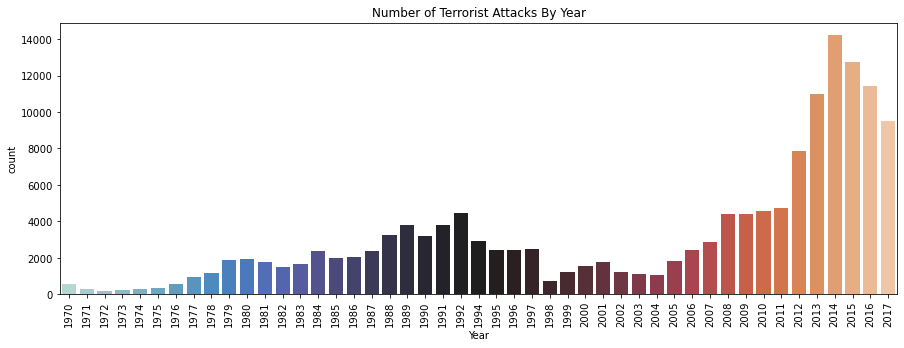

In [16]:
## setting figure size
plt.figure(figsize=(15,5))
## selecting iyear column form dataset 
sns.countplot(datareq['iyear'],palette='icefire')
## xlabels to be rotatated at 90 degrees 
plt.xticks(rotation = 90)
## title of our plot
plt.title('Number of Terrorist Attacks By Year');
## X axis label 
plt.xlabel('Year')
plt.show()

Sudden rise in attacks from year 2011

### ii.Month

In [ ]:
## Count of attack month wise 

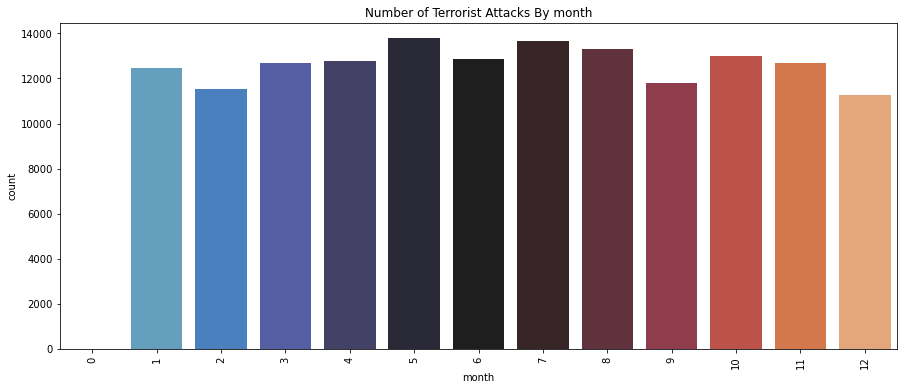

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(datareq['imonth'],palette='icefire')
plt.xticks(rotation = 90)
plt.title('Number of Terrorist Attacks By month');
plt.xlabel('month')
plt.show()

### iii.Day

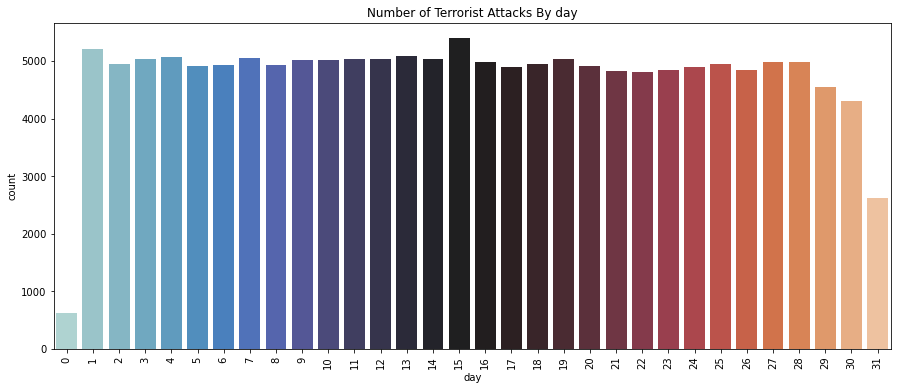

In [18]:
## Count of attack day wise
plt.figure(figsize=(15,6))
sns.countplot(datareq['iday'],palette='icefire')
plt.xticks(rotation = 90)
plt.title('Number of Terrorist Attacks By day');
plt.xlabel('day')
plt.show()

Can't say much from month and day 

### iv.Attack type

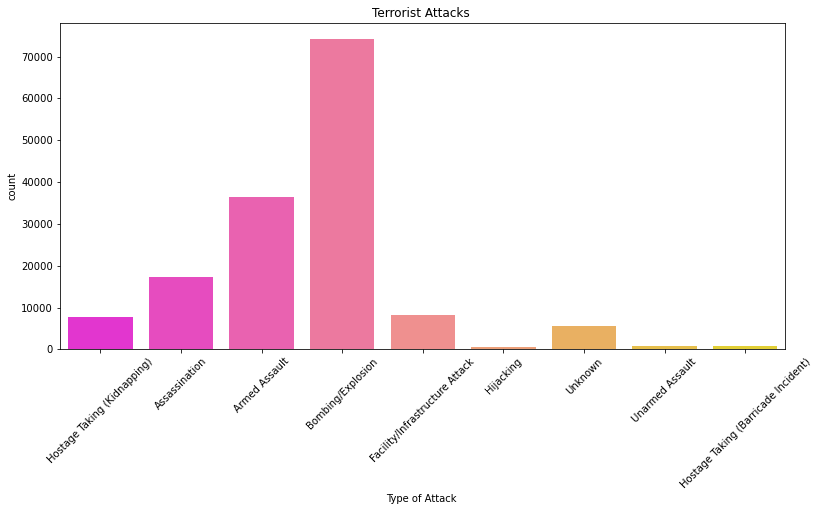

In [19]:
## Plot for finding  attack type used most 
plt.figure(figsize=(13,6))
sns.countplot(datareq['attacktype1_txt'],palette='spring')
plt.xticks(rotation = 45)
plt.title('Terrorist Attacks ');
plt.xlabel('Type of Attack ')
plt.show()

Most common attack type is  bombing/Explosion followed by Armed Assault 

### v.Country

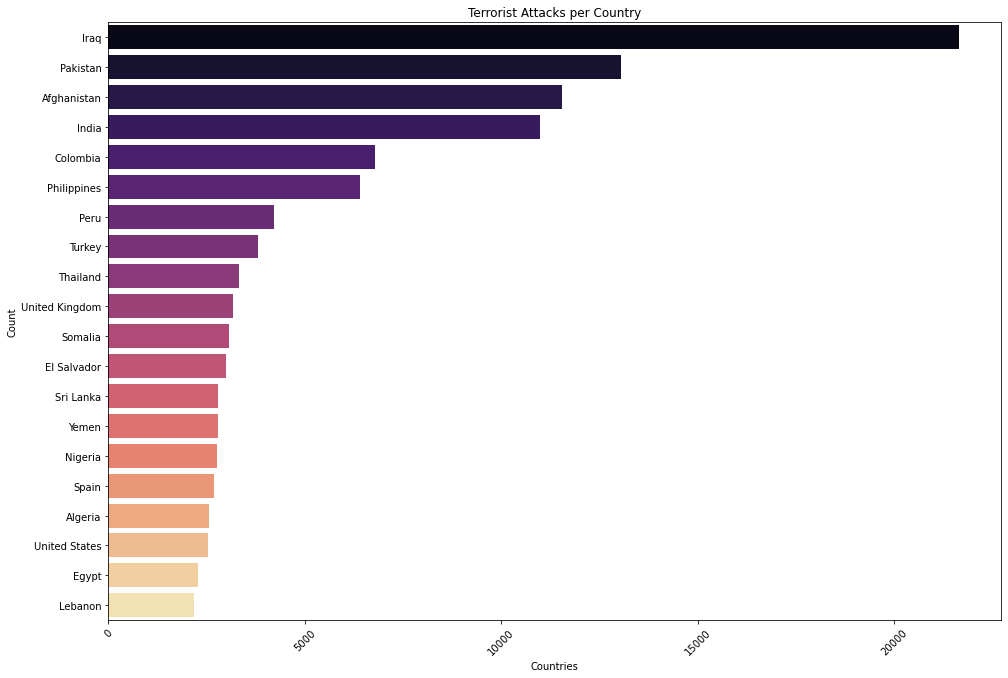

In [20]:
# FIGURE SIZE
plt.figure(figsize=(16,11))
## y = 20 country set  as index  , x = count of 20 countries attack most 
sns.barplot(y=datareq['country_txt'].value_counts()[:20].index, x=datareq['country_txt'].value_counts()[:20].values,palette="magma")
plt.xlabel('Countries')
plt.ylabel('Count')   
plt.xticks(rotation= 45)
plt.title('Terrorist Attacks per Country')
plt.show()


Iraq , Pakistan, Afganistan, India , Colombia are highly affected by terror attacks

### City

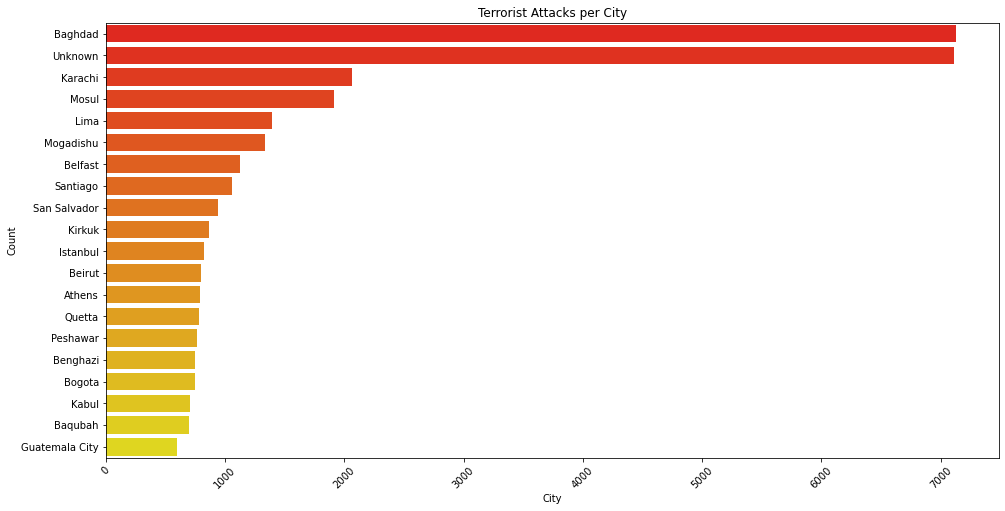

In [21]:
plt.figure(figsize=(16,8))
# y = 20 city set  as index  , x = count of 20 cities attack most 
sns.barplot(y=datareq['city'].value_counts()[:20].index,x=datareq['city'].value_counts()[:20].values,palette="autumn")
plt.xlabel('City')
plt.ylabel('Count')   
plt.xticks(rotation= 45)
plt.title('Terrorist Attacks per City')
plt.show()

Bagdad  and Karachi have seen huge no of terror attacks

### v.Region 

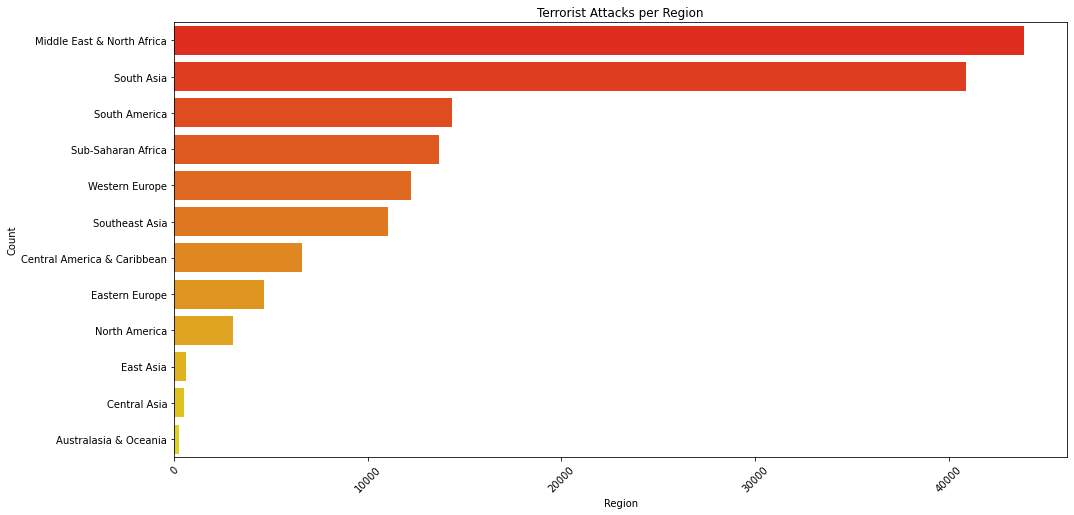

In [22]:
plt.figure(figsize=(16,8))
# y = region set  as index  , x = count of regions attack most 
sns.barplot(y=datareq['region_txt'].value_counts().index, x=datareq['region_txt'].value_counts().values,palette="autumn")
plt.xlabel('Region')
plt.ylabel('Count')   
plt.xticks(rotation= 45)
plt.title('Terrorist Attacks per Region')
plt.show()

Middle East and Noth Africa , Soutn Asia are attacked more compared to other regions

### vi.gname 

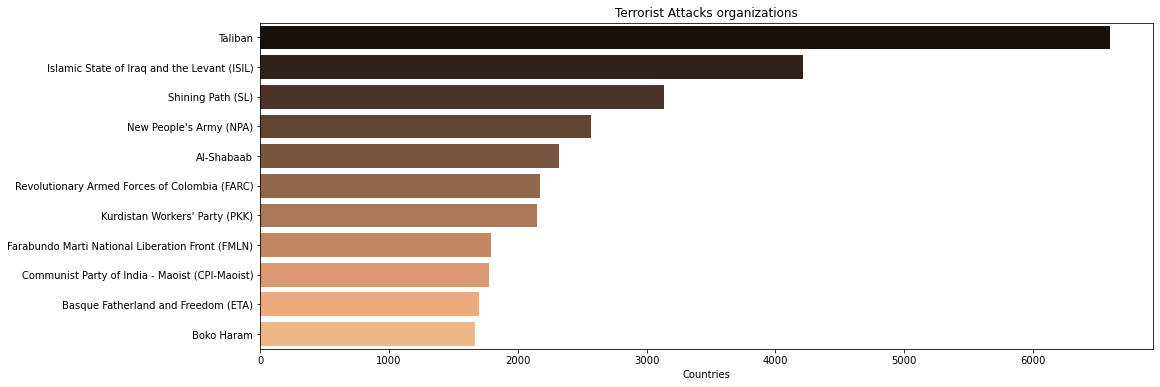

In [23]:
plt.figure(figsize=(16,6))
## y = organization set  as index  , x = count of organisation attack most  , 
## index starting from one as there are unknown values in our dataset
sns.barplot(y=datareq['gname'].value_counts()[1:12].index, x=datareq['gname'].value_counts()[1:12].values,palette="copper")
plt.xlabel('Count)
plt.title('Terrorist Attacks organizations')
plt.show()

Majority of the atttacks are from Taliban , ISIL , Shining Path 

### vi.Weapon Type

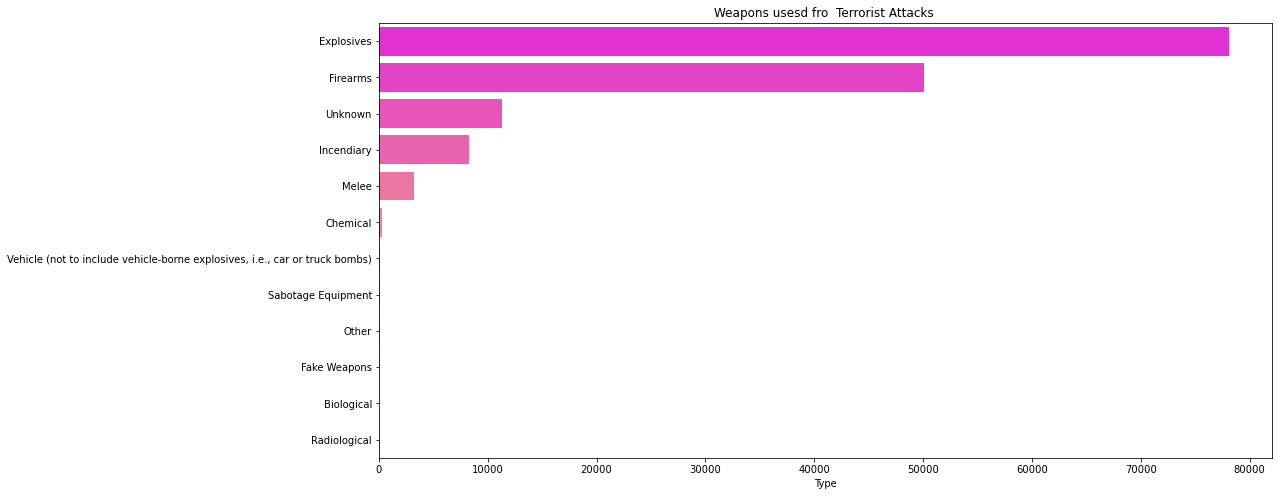

In [24]:
## Weapons used in attacks 
plt.figure(figsize=(16,8))
sns.barplot(y=datareq['weaptype1_txt'].value_counts().index, x=datareq['weaptype1_txt'].value_counts().values,palette="spring")
plt.xlabel('Type')
plt.title('Weapons usesd fro  Terrorist Attacks ')
plt.show()


Explosives are usesd often followed by Firearms

### vii.success



In [120]:
datareq["success"].value_counts(normalize=True)

1    0.881317
0    0.118683
Name: success, dtype: float64

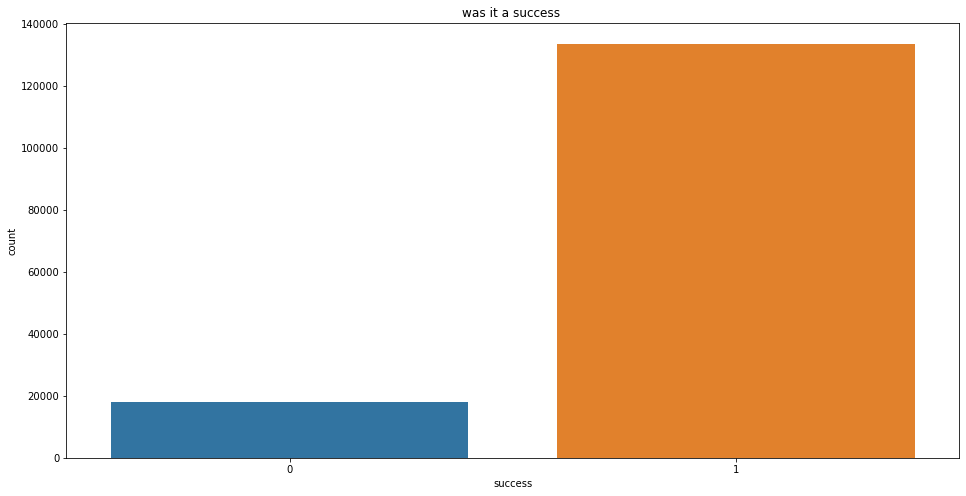

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(datareq['success'])
plt.title('was it a success ')
plt.show()

Attacks were mostly successful 

### viii.Target type

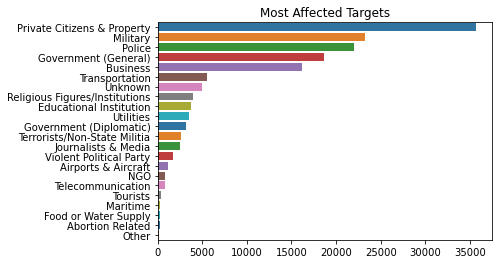

In [26]:
## Target of terrorist attackers 
plt.plot(figsize=(15,7))
sns.barplot(y=datareq['targtype1_txt'].value_counts().index,x=datareq['targtype1_txt'].value_counts().values,
           palette='tab10')
plt.title('Most Affected Targets')
plt.show()

Citizen & property , Government , Police , Military are main target 

### Bi-variate Analysis

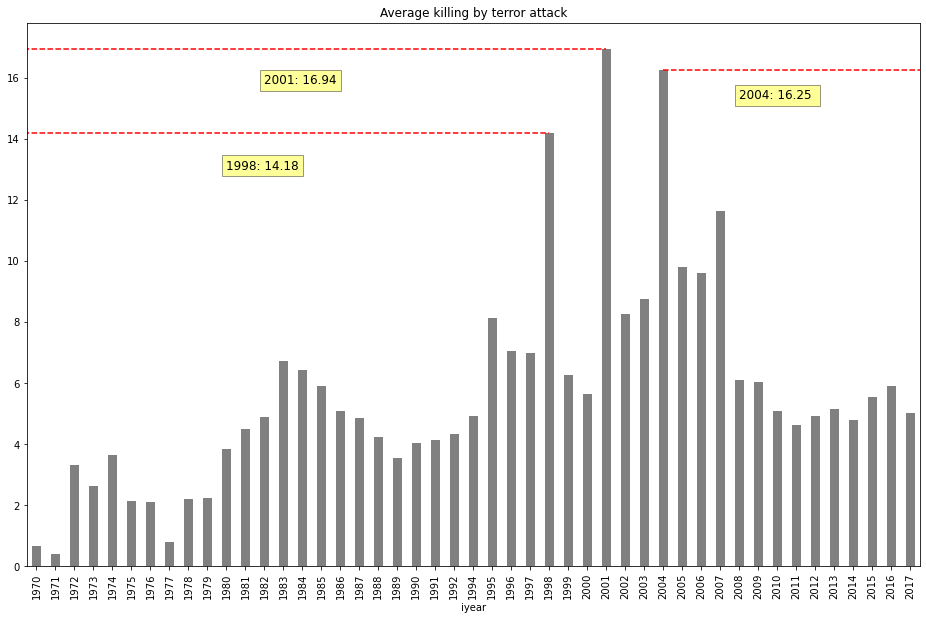

In [27]:
plt.figure(figsize=(16,10))
avg_casualties = datareq.groupby(['iyear'])['casualties'].mean()
avg_casualties.plot.bar(color='grey') 
plt.title('Average killing by terror attack')
plt.hlines(y=avg_casualties.loc[1998],colors='red',xmin=-4,xmax=27,linestyles='--')
plt.hlines(y=avg_casualties.loc[2001],colors='red',xmin=-4,xmax=30,linestyles='--')
plt.hlines(y=avg_casualties.loc[2004],colors='red',xmin=33,xmax=50,linestyles='--')
plt.text(10, 13, '1998: 14.18',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.4))
plt.text(12, 15.8, '2001: 16.94',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.4))
plt.text(37, 15.3, '2004: 16.25 ',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.4))
plt.show()

## Let's see if extended attacks did more disaster than non extended ones 

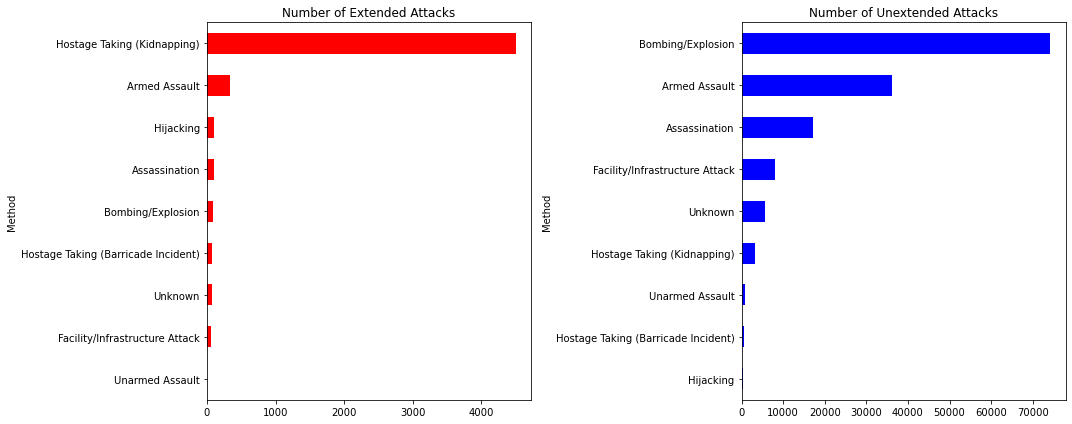

In [28]:
## plotting two plots in single row 
fig,ax = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
## grouping the data by attack type and extended 
ax[0]=datareq[datareq['extended']==1].groupby('attacktype1_txt').count()['extended'].sort_values().plot.barh(color='red',ax=ax[0])

## grouping the data by attack type and unextended
ax[1]=datareq[datareq['extended']==0].groupby('attacktype1_txt').count()['extended'].sort_values().plot.barh(color='blue',ax=ax[1])
## title of extended attacks 
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()


Extended attacks overwhelmingly consist of hostage taking. On the other hand,unextended attacks seem to be a bit more spread between bombings/explosions, armed assaults, and assassinations.

## Casualities in both extended and unxtended attacks

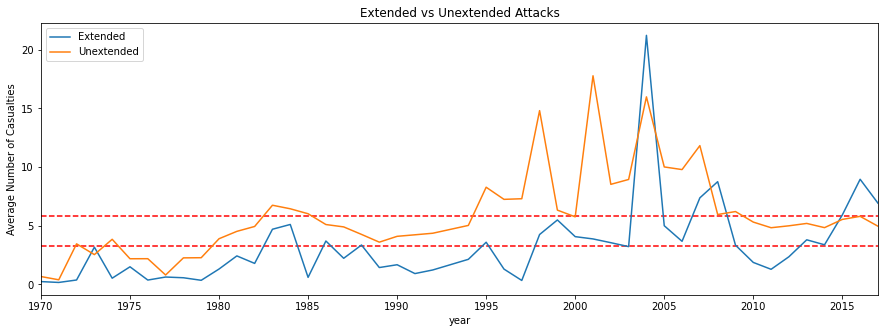

In [29]:
fig,axes = plt.subplots(figsize=(15,5))
## grouping extended attacks by year and causaulties in thousands
ext_casualties = datareq[datareq['extended']==1].groupby('iyear').mean()['casualties']
ext_casualties.plot()
## unextended attacks by year and causaulties in thousands
unext_casualties = datareq[datareq['extended']==0].groupby('iyear').mean()['casualties']
unext_casualties.plot()
plt.title('Extended vs Unextended Attacks')
plt.xlabel('year')
## setting limit of x axis
plt.xlim(1970,2017)
## labels of x axis with interval of 5 
plt.xticks(np.arange(1970,2017,5))
plt.ylabel('Average Number of Casualties')
## horizontal line representing extended casualities
plt.hlines(y=ext_casualties.mean(),colors='red',xmin=1970,xmax=2017,linestyles='--')
## horizontal line representing unextended casualities
plt.hlines(y=unext_casualties.mean(),colors='red',xmin=1970,xmax=2017,linestyles='--')
axes.legend(labels=['Extended','Unextended'],loc='upper left')
plt.show()

Unextended attacks seem to have been historically more lethal, with more casualties than extended attacks. This is expected given the fact that bombings and explosions are the most used form of terrorism. Generally, these events happen in a shorter timeframe but are outright more destructive than extended attacks such as hostage takings.

## Analysis of  Country :India

In [30]:
## creating a dataframe for india 
India_data= datareq[datareq["country_txt"]=="India"]

In [32]:
India_data.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,provstate,suicide,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound,casualties
1186,1972,2,22,0,India,South Asia,New Delhi,Delhi,0,1,Hijacking,Airports & Aircraft,Palestinians,Explosives,0.0,0.0,0.0
2764,1975,1,2,0,India,South Asia,Samastipur,Bihar,0,1,Bombing/Explosion,Government (General),Ananda Marga,Explosives,4.0,0.0,4.0
3857,1976,5,26,0,India,South Asia,New Delhi,Delhi,0,1,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,0.0,0.0,0.0
5327,1977,9,28,0,India,South Asia,Bombay,Maharashtra,0,1,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,0.0,0.0,0.0
7342,1979,1,14,0,India,South Asia,Imphal,Manipur,0,1,Assassination,Government (General),Unknown,Firearms,3.0,0.0,3.0


In [40]:
India_data.shape

(10994, 17)

In [41]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10994 entries, 1186 to 181689
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            10994 non-null  int64  
 1   imonth           10994 non-null  int64  
 2   iday             10994 non-null  int64  
 3   extended         10994 non-null  int64  
 4   country_txt      10994 non-null  object 
 5   region_txt       10994 non-null  object 
 6   city             10994 non-null  object 
 7   provstate        10994 non-null  object 
 8   suicide          10994 non-null  int64  
 9   success          10994 non-null  int64  
 10  attacktype1_txt  10994 non-null  object 
 11  targtype1_txt    10994 non-null  object 
 12  gname            10994 non-null  object 
 13  weaptype1_txt    10994 non-null  object 
 14  nkill            10994 non-null  float64
 15  nwound           10994 non-null  float64
 16  casualties       10994 non-null  float64
dtypes: float

In [42]:
## Null values in data 
India_data.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country_txt        0
region_txt         0
city               0
provstate          0
suicide            0
success            0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
nkill              0
nwound             0
casualties         0
dtype: int64

In [43]:
## Duplicate values 
India_data = India_data.drop_duplicates()

In [44]:
India_data.shape

(10994, 17)

## Year

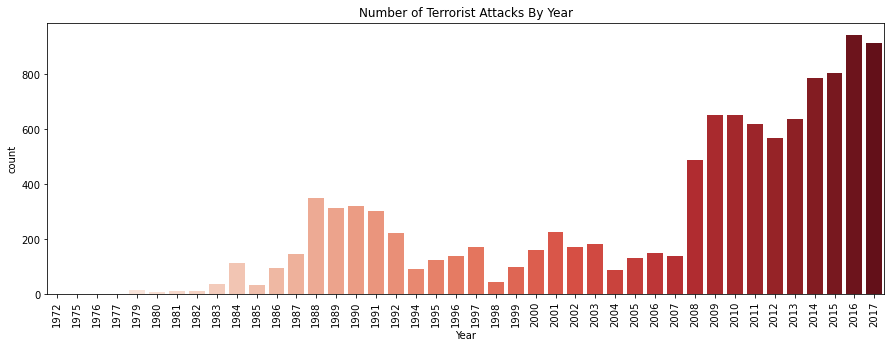

In [37]:
## setting figure size
plt.figure(figsize=(15,5))
## selecting iyear column form dataset 
sns.countplot(India_data['iyear'],palette='Reds')
## xlabels to be rotatated at 90 degrees 
plt.xticks(rotation = 90)
## title of our plot
plt.title('Number of Terrorist Attacks By Year');
## X axis label 
plt.xlabel('Year')
plt.show()

#### We can see that count of attacks in India has increased from year 2008

## Month

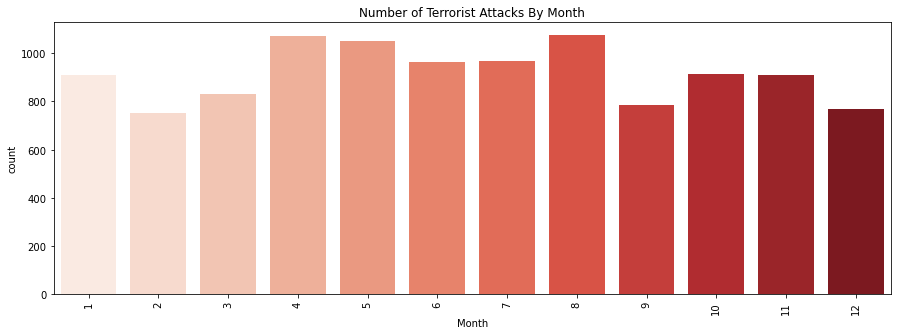

In [38]:
plt.figure(figsize=(15,5))
## selecting imonth column form dataset 
sns.countplot(India_data['imonth'],palette='Reds')
## xlabels to be rotatated at 90 degrees 
plt.xticks(rotation = 90)
## title of our plot
plt.title('Number of Terrorist Attacks By Month');
## X axis label 
plt.xlabel('Month')
plt.show()

## Day 

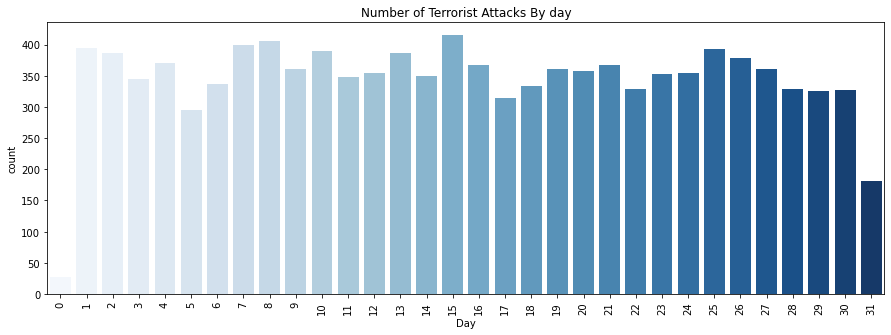

In [39]:
plt.figure(figsize=(15,5))
## selecting iday column form dataset 
sns.countplot(India_data['iday'],palette='Blues')
## xlabels to be rotatated at 90 degrees 
plt.xticks(rotation = 90)
## title of our plot
plt.title('Number of Terrorist Attacks By day');
## X axis label 
plt.xlabel('Day')
plt.show()

### By graphs we can see that 15th August hold highes no of attacks

## State affected by terror attacks 

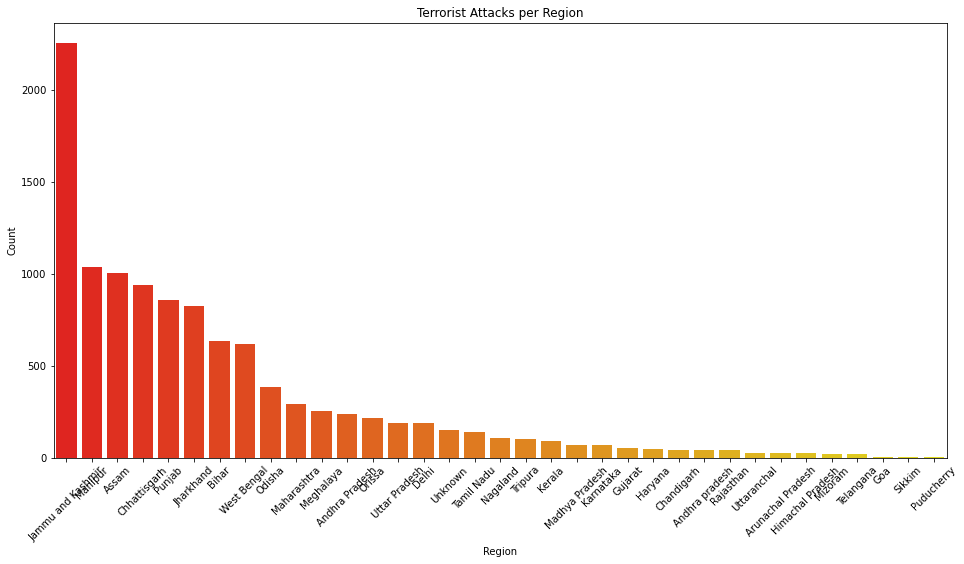

In [55]:
plt.figure(figsize=(16,8))
# y = cregion set  as index  , x = count of regions attack most 
sns.barplot(x=India_data['provstate'].value_counts().index, y=India_data['provstate'].value_counts().values,palette="autumn")
plt.xlabel('state')
plt.ylabel('Count')   
plt.xticks(rotation= 45)
plt.title('Terrorist Attacks per State')
plt.show()

###  Jammu and kashmir , Manipur ,Assam are highly affected 

## City affected by terror attacks 

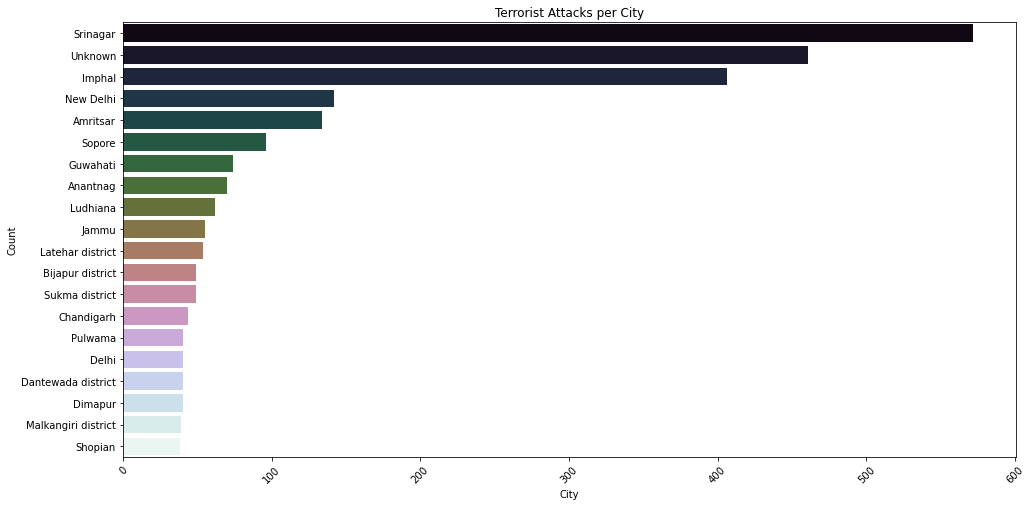

In [59]:
plt.figure(figsize=(16,8))
# y = 20 city set  as index  , x = count of 20 cities attack most 
sns.barplot(y=India_data['city'].value_counts()[:20].index,x=India_data['city'].value_counts()[:20].values,palette="cubehelix")
plt.xlabel('City')
plt.ylabel('Count')   
plt.xticks(rotation= 45)
plt.title('Terrorist Attacks per City')
plt.show()

### Srinagar and Imphal are more affected from states j&K and manipur  

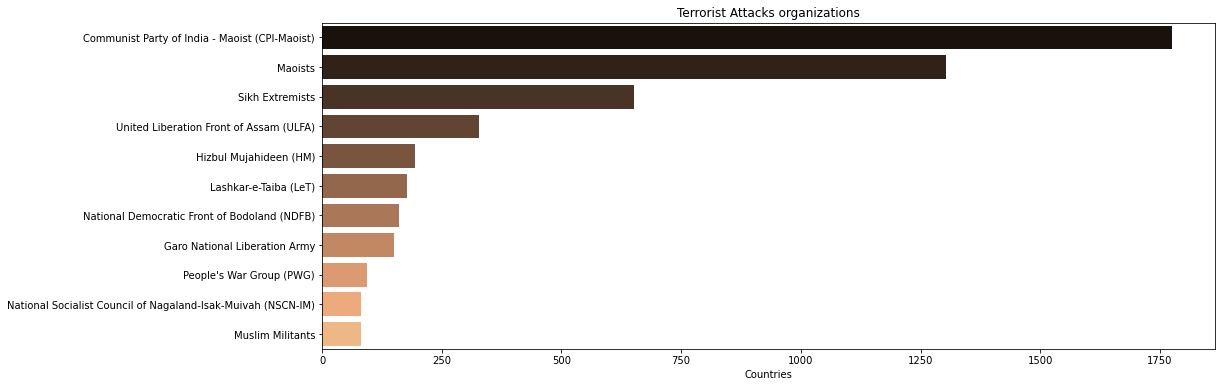

In [60]:
plt.figure(figsize=(16,6))
## y = organization set  as index  , x = count of organisation attack most  , 
## index starting from one as there are unknown values in our dataset
sns.barplot(y=India_data['gname'].value_counts()[1:12].index, x=India_data['gname'].value_counts()[1:12].values,palette="copper")
plt.xlabel('Count')
plt.title('Terrorist Attacks organizations')
plt.show()

### CPI-Maoist , Maoists  , sikh Extermists are more active  organzation 

## State wise oragnisation number 

In [72]:
India_data.gname.value_counts()

Unknown                                             4007
Communist Party of India - Maoist (CPI-Maoist)      1776
Maoists                                             1304
Sikh Extremists                                      651
United Liberation Front of Assam (ULFA)              327
                                                    ... 
Political Group                                        1
Al-Hamas Mujahideen                                    1
Kisar Liberation Movement                              1
United Democratic Terai Liberation Front (UDTLF)       1
Jarnail Khalsa                                         1
Name: gname, Length: 292, dtype: int64

In [88]:
## grouping provstate by organisation count 
state_gname = India_data.groupby ("provstate")["gname"].value_counts()
state_gname 

provstate       gname                                         
Andhra Pradesh  People's War Group (PWG)                          68
                Communist Party of India - Maoist (CPI-Maoist)    50
                Maoists                                           43
                Unknown                                           37
                Naxalites                                         16
                                                                  ..
West Bengal     National Liberation Front of Tripura (NLFT)        1
                Naxalites                                          1
                Political Group                                    1
                United Achik National Front (UANF)                 1
                United Liberation Front of Assam (ULFA)            1
Name: gname, Length: 635, dtype: int64

In [91]:
# orgnaization running in sate 
state_gname["Jammu and Kashmir"]

gname
Unknown                         1395
Hizbul Mujahideen (HM)           188
Lashkar-e-Taiba (LeT)            156
Kashmiri extremists               65
Muslim Militants                  64
                                ... 
Minority Unity Forum               1
Pakistani trained terrorists       1
Quit Kashmir Movement (QKM)        1
Tehrik-e-Hurriyat (TeH)            1
United Jihad Council               1
Name: gname, Length: 64, dtype: int64

## Types of Attack 

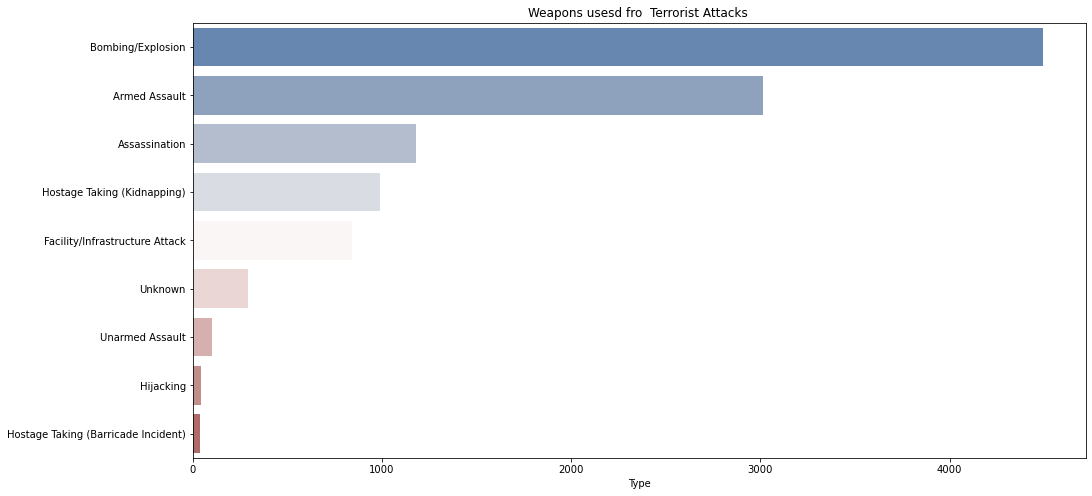

In [93]:
## Type of attack 
plt.figure(figsize=(16,8))
sns.barplot(y=India_data['attacktype1_txt'].value_counts().index, x=India_data['attacktype1_txt'].value_counts().values,palette="vlag")
plt.xlabel('Type')
plt.title('Weapons usesd fro  Terrorist Attacks ')
plt.show()

####  bombing and explosion , Armed Assault are methods used for attaking 

## Target of attackers 

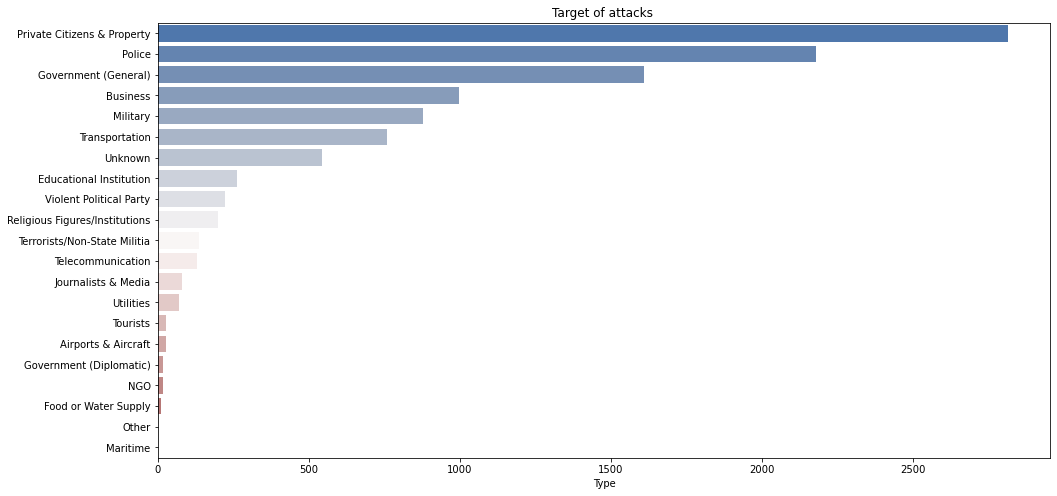

In [122]:
## Target of the terrorist attacks
plt.figure(figsize=(16,8))
sns.barplot(y=India_data['targtype1_txt'].value_counts().index, x=India_data['targtype1_txt'].value_counts().values,palette="vlag")
plt.xlabel('Type')
plt.title('Target of attacks ')
plt.show()

## Effect of Extended and  Unextended attacks

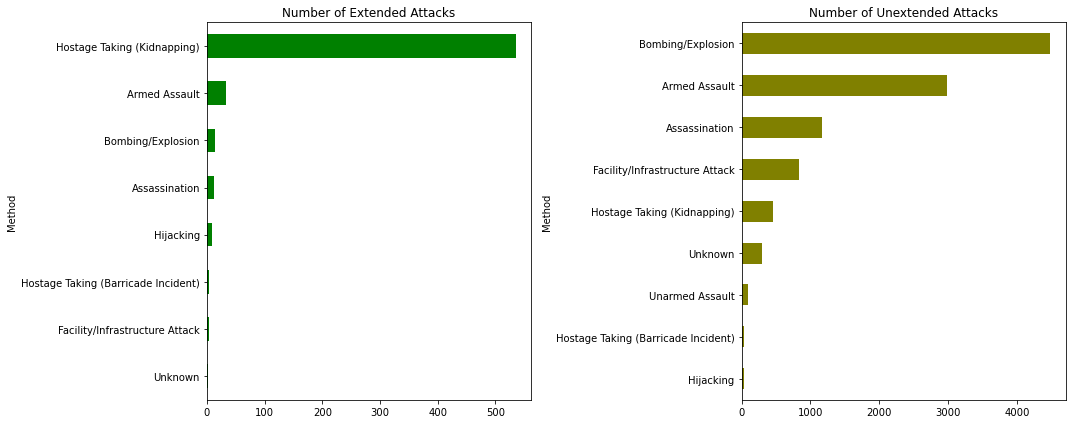

In [98]:
## plotting two plots in single row 
fig,ax = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
## grouping the data by attack type and extended 
ax[0]=India_data[India_data['extended']==1].groupby('attacktype1_txt').count()['extended'].sort_values().plot.barh(color='green',ax=ax[0])

## grouping the data by attack type and unextended
ax[1]=India_data[India_data['extended']==0].groupby('attacktype1_txt').count()['extended'].sort_values().plot.barh(color='olive',ax=ax[1])
## title of extended attacks 
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()

####  Unextended attacks are more dangerous and cause lot of causalties  while extended were more of Kidnapping 

## Success of attack 

In [115]:
India_data.success.value_counts(normalize=True)

1    0.853647
0    0.146353
Name: success, dtype: float64

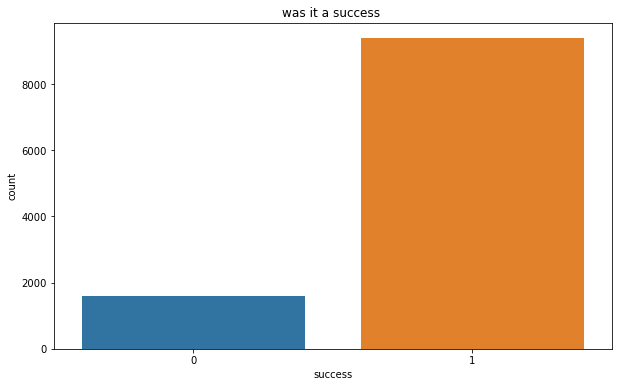

In [117]:
plt.figure(figsize=(10,6))
sns.countplot(India_data['success'])
plt.title('was it a success ')
plt.show()

## Coclusion on basis of Analysis done (All)
* Since 2011 no of terror attacks have increased 
* 88% attacks were successfull
* Taliban , ISIL are most active organization 
* Country:Iraq ,Pakistan ||  Region:Middle East and North Africa ,South Asia || City :Bagdad, Karachin are most effected by these attacks 
* Mainly method used for these attacks are Bombs/Explosive and Assasination 
* Unextended attack result in more damage compared to extended one 
* Weapon mostly used are Explosives and firearms 

## Coclusion on basis of Analysis( India )

* Since 2008 no of terror attacks have increased ,and  more no attacks have happened in month of August and  15th day of the month 
* 85% attacks were successfull
* CPI-Maoist , Maoist are most active organizations 
* State :J&K , Manipur || City :Srinagar and Imphal are most effected by these attacks 
* Mainly method used for these attacks are Bombs/Explosive and Assasination 
* Unextended attack result in more damage compared to extended one 
* Weapon mostly used are Explosives and firearms 